In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Find missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


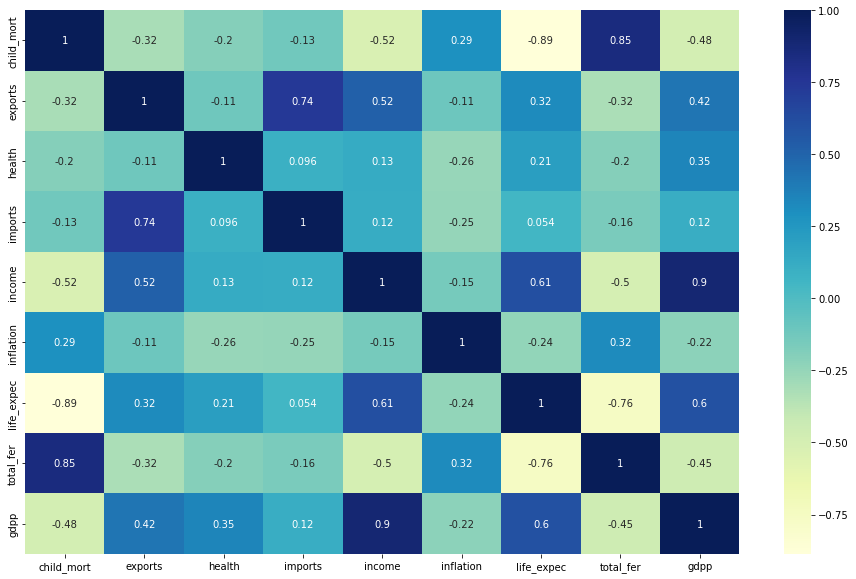

In [7]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

    GDPP and income are highly correlated. Number of children born per womantotal fertility is highly correlated with child mortality, Imports and exports are highly correlated  Life expectancy is highly negatively correlated with child mortality. Life expenctancy is correlated with income Life expectancy is correlated with GDPP.Hence drop life expectancy, total fertility and income as they are highly correlated

In [8]:
# drop the correlated feature
data2 = df.drop(columns = ['income', 'country', 'life_expec', 'total_fer'])


In [9]:
data2.head()

,child_mort,exports,health,imports,inflation,gdpp
0,90.2,10.0,7.58,44.9,9.44,553
1,16.6,28.0,6.55,48.6,4.49,4090
2,27.3,38.4,4.17,31.4,16.10,4460
3,119.0,62.3,2.85,42.9,22.40,3530
4,10.3,45.5,6.03,58.9,1.44,12200


In [11]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)

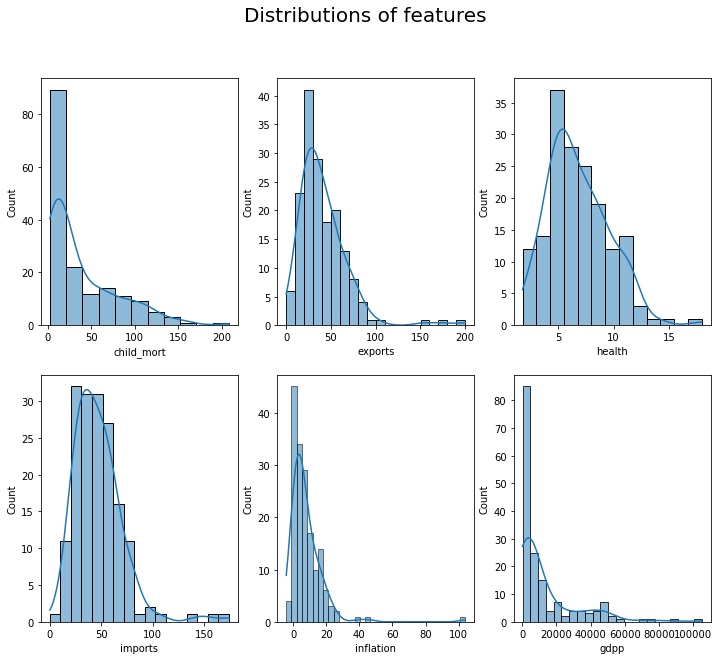

In [12]:
#plot some graphs to check feature distributions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
ax = ax.flatten() #allows axes to be looped over
plt.suptitle("Distributions of features", fontsize=20)
for x, i in enumerate(data2.columns):
    sns.histplot(data2[i], ax = ax[x], kde=True, palette="Blues")

In [14]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(data_scaled) 
    wcss.append(kmeans.inertia_)
    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


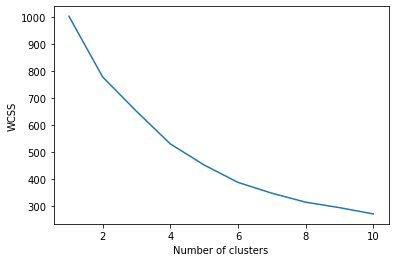

In [15]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


In [16]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 123)
y_kmeans = kmeans.fit_predict(data_scaled)
y_kmeans 

array([0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0])

In [17]:
model = KMeans(n_clusters=4, random_state=123)
model.fit(data2)

KMeans(n_clusters=4, random_state=123)

In [19]:
# Add a new column to the original dataset
df['Cluster'] = model.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [20]:
df.Cluster.value_counts()

1    110
3     29
0     24
2      4
Name: Cluster, dtype: int64

In [21]:
# Show the means of each feature from the describe function
clst_av = df.describe().iloc[1:2]
clst_av

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
mean,38.27006,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.227545


In [22]:
#check the average values for each cluster.

clusters = df.groupby(['Cluster']).mean()
clusters

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,4.983333,51.795833,9.107917,45.137500,44658.333333,2.728500,80.479167,1.825000,42458.333333
1,53.342727,34.043627,6.254364,45.873326,6669.663636,9.235764,66.650909,3.497091,3110.127273
2,4.875000,85.250000,7.640000,61.900000,83625.000000,4.216750,81.000000,1.792500,84425.000000
3,13.251724,52.975862,6.934138,50.127586,24937.931034,6.940724,75.713793,1.953793,16075.862069


In [23]:
#create a dataframe to compare each feature and cluster around the average for each cluster
checkclt = clusters.copy()
for i in range(0,4):
    for col in checkclt.columns:
        if checkclt[col][i]>=clst_av[col][0]:
            checkclt[col][i] = "Above"
        else:
            checkclt[col][i] = "Below"

checkclt

C:\Users\hp\AppData\Local\Temp/ipykernel_6752/3898862810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkclt[col][i] = "Above"
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\hp\AppData\Local\Temp/ipykernel_6752/3898862810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkclt[col][i] = "Below"


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,Below,Above,Above,Below,Above,Below,Above,Below,Above
1,Above,Below,Below,Below,Below,Above,Below,Above,Below
2,Below,Above,Above,Above,Above,Below,Above,Below,Above
3,Below,Above,Above,Above,Above,Below,Above,Below,Above
